# Обработка таблицы

In [3]:
import pandas as pd


In [4]:
bank_df=pd.read_csv('/content/drive/MyDrive/курс python analitic/Portfolio Lesson/bank_clients_transactions.csv')

In [5]:
bank_df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [6]:

# Преобразование с указанием формата и учетом, что год указан двумя цифрами
bank_df['CustomerDOB'] = pd.to_datetime(bank_df['CustomerDOB'], format='%d/%m/%y', errors='coerce')
bank_df['TransactionDate'] = pd.to_datetime(bank_df['TransactionDate'], format='%d/%m/%y', errors='coerce')


In [7]:
# Создаем словарь: CustomerID -> CustomerDOB (первое ненулевое значение)
dob_map = bank_df.dropna(subset=['CustomerDOB']).groupby('CustomerID')['CustomerDOB'].first()

# Функция для заполнения пропусков
def fill_dob(row):
    if pd.isna(row['CustomerDOB']):
        return dob_map.get(row['CustomerID'], pd.NaT)
    else:
        return row['CustomerDOB']

bank_df['CustomerDOB'] = bank_df.apply(fill_dob, axis=1)

# Удаляем записи, где CustomerDOB всё ещё пропущен
bank_df = bank_df.dropna(subset=['CustomerDOB']).copy()

print(f'Осталось записей после заполнения и удаления: {bank_df.shape[0]}')


Осталось записей после заполнения и удаления: 1004680


In [8]:
bank_df.isna().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,0
CustGender,405
CustLocation,151
CustAccountBalance,2238
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [9]:
# Удаляем  пропуски
bank_df = bank_df.dropna().reset_index(drop=True)

In [10]:
bank_df.rename(columns={'TransactionAmount (INR)':'TransactionAmount'},inplace=True)

In [11]:
bank_df.isna().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionTime,0
TransactionAmount,0


In [12]:
bank_df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1001881,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1001882,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1001883,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1001884,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


# Аналитика

In [13]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001886 entries, 0 to 1001885
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   TransactionID       1001886 non-null  object        
 1   CustomerID          1001886 non-null  object        
 2   CustomerDOB         1001886 non-null  datetime64[ns]
 3   CustGender          1001886 non-null  object        
 4   CustLocation        1001886 non-null  object        
 5   CustAccountBalance  1001886 non-null  float64       
 6   TransactionDate     1001886 non-null  datetime64[ns]
 7   TransactionTime     1001886 non-null  int64         
 8   TransactionAmount   1001886 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 68.8+ MB


1. Определить количество клиентов;

In [14]:
unic_cust_count=bank_df['CustomerID'].nunique()
unic_cust_count

839117

2. Узнать общее количество транзакций

In [15]:
transaction_count=bank_df['TransactionID'].count()
transaction_count

np.int64(1001886)

3. Посчитай среднее количество транзакций на клиента, используя группировку или деление общего количества транзакций на число уникальных клиентов;

In [16]:
transaction_per_customer=bank_df.groupby('CustomerID').agg({'TransactionID':'count'}).rename(columns={'TransactionID':'avg_count_transaction'})
avg_transaction=transaction_per_customer.mean()
avg_transaction

,0
avg_count_transaction,1.193977


4. Изучи распределение и размах величин, таких как баланс клиента и сумма транзакций, с помощью графиков, включая ящик с усами и гистограммы (при этом опытным путем определи оптимальное количество корзин);

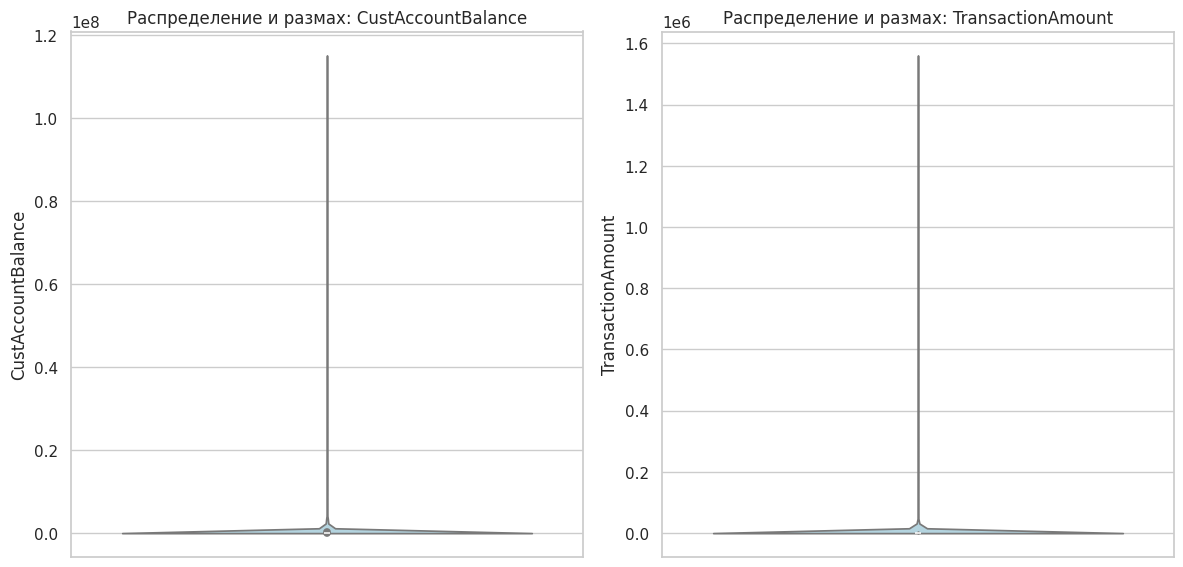

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns

# Установка стиля графика
sns.set(style="whitegrid")

# Выбор интересующих колонок
cols = ['CustAccountBalance', 'TransactionAmount']

# Создание графиков
plt.figure(figsize=(12, 6))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 2, i)
    sns.violinplot(data=bank_df, y=col, inner='box', color='lightblue')
    plt.title(f'Распределение и размах: {col}')
    plt.ylabel(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()


=== CustAccountBalance ===
Min: 0.00
25% (Q1): 4,629.90
Median: 16,232.81
75% (Q3): 54,881.89
Max: 115,035,495.10
IQR (Q3 - Q1): 50,251.99
Std: 827,204.10

=== TransactionAmount ===
Min: 0.00
25% (Q1): 155.00
Median: 440.00
75% (Q3): 1,150.00
Max: 1,560,034.99
IQR (Q3 - Q1): 995.00
Std: 6,254.71


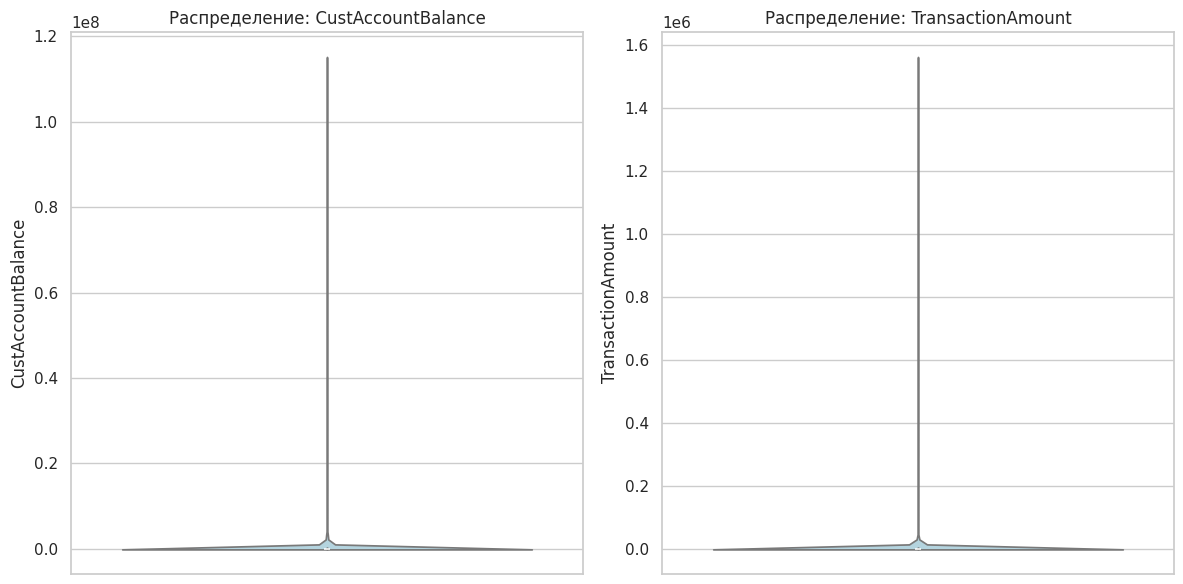

In [18]:
# Установка стиля графика
sns.set(style="whitegrid")

# Выбор колонок
cols = ['CustAccountBalance', 'TransactionAmount']

# Вычисление и вывод статистик
for col in cols:
    series = bank_df[col]
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    print(f'\n=== {col} ===')
    print(f'Min: {series.min():,.2f}')
    print(f'25% (Q1): {q1:,.2f}')
    print(f'Median: {series.median():,.2f}')
    print(f'75% (Q3): {q3:,.2f}')
    print(f'Max: {series.max():,.2f}')
    print(f'IQR (Q3 - Q1): {iqr:,.2f}')
    print(f'Std: {series.std():,.2f}')

# Построение скрипичных графиков
plt.figure(figsize=(12, 6))
for i, col in enumerate(cols, 1):
    plt.subplot(1, 2, i)
    sns.violinplot(data=bank_df, y=col, inner='box', color='lightblue')
    plt.title(f'Распределение: {col}')
    plt.ylabel(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

 CustAccountBalance (Баланс клиента):
- Минимум: 0 — часть клиентов имеет нулевой баланс.
- Медиана: 16,233 — у половины клиентов баланс меньше этой суммы.
- Межквартильный размах (IQR): от 4,630 до 54,882 — основной диапазон типичных значений.
- Максимум: 115 млн — явный выброс, сильно выше остальных значений.
- Стандартное отклонение: 827,204 — высокая разбросанность значений из-за крупных счетов.

Вывод: большинство клиентов имеют умеренные балансы, но есть редкие счета с аномально высокими суммами, что сильно искажает распределение.

TransactionAmount (Сумма транзакции):
- Минимум: 0 — вероятны нулевые или тестовые транзакции.
- Медиана: 440 — половина транзакций укладываются в эту сумму.
- IQR: от 155 до 1,150 — типичный диапазон большинства операций.
- Максимум: 1.56 млн — единичные транзакции с очень высокой суммой.
- Стандартное отклонение: 6,255 — высокая вариативность, но меньше, чем по балансу.

Вывод: структура транзакций типична — большинство на небольшие суммы, но встречаются крупные платежи, которые заметно увеличивают разброс.

5. Проанализируй возраст клиентов. Можно посмотреть и текущее состояние клиентов, и состояние на момент совершения транзакции;

In [24]:
# 1. Фильтр записей с отрицательным возрастом
neg_age_mask = (bank_df['AgeToday'] < 0) | (bank_df['AgeAtTransaction'] < 0)

# 2. Создаем маппинг: CustomerID -> самая ранняя корректная дата рождения
dob_map = (
    bank_df[~neg_age_mask]  # только с положительным возрастом
    .groupby('CustomerID')['CustomerDOB']
    .min()
)

# 3. Заменяем ошибочные даты рождения на корректные (если есть)
bank_df.loc[neg_age_mask, 'CustomerDOB'] = bank_df.loc[neg_age_mask, 'CustomerID'].map(dob_map)

# 4. Пересчитываем возраст
today = pd.Timestamp.today()
bank_df['AgeToday'] = (today - bank_df['CustomerDOB']).dt.days // 365
bank_df['AgeAtTransaction'] = (bank_df['TransactionDate'] - bank_df['CustomerDOB']).dt.days // 365

# 5. Опционально: удалить строки, где возраст всё ещё отрицательный
bank_df = bank_df[(bank_df['AgeToday'] >= 0) & (bank_df['AgeAtTransaction'] >= 0)].copy()

print("Обработка завершена. Отрицательные возраста устранены.")

Обработка завершена. Отрицательные возраста устранены.


In [21]:
from datetime import datetime

# Текущая дата
today = pd.Timestamp(datetime.today().date())

# Возраст клиента на текущий момент
bank_df['AgeToday'] = (today - bank_df['CustomerDOB']).dt.days // 365

In [22]:
# Возраст на момент транзакции
bank_df['AgeAtTransaction'] = (bank_df['TransactionDate'] - bank_df['CustomerDOB']).dt.days // 365

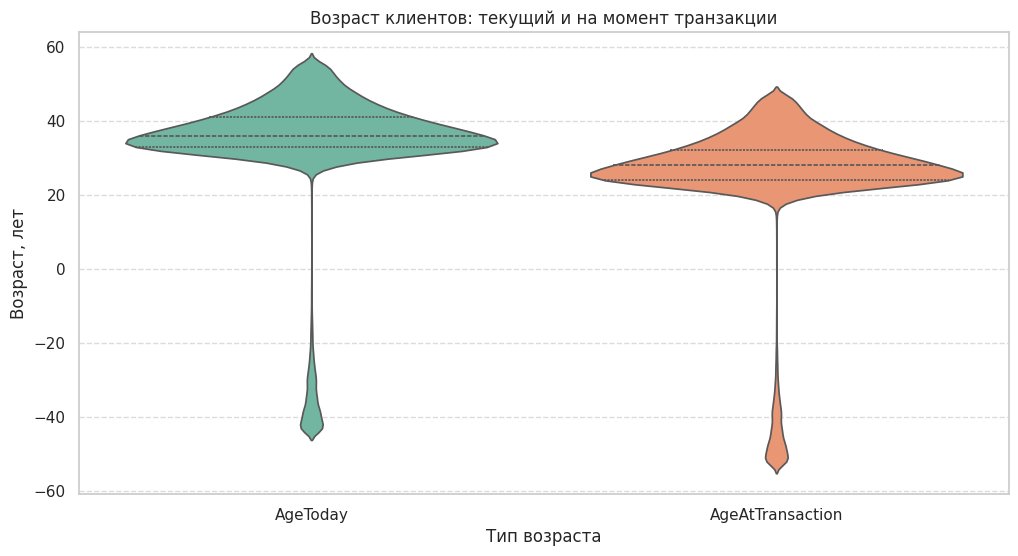

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Скрипичный график для обоих возрастов
sns.violinplot(data=bank_df[['AgeToday', 'AgeAtTransaction']], inner='quartile', palette='Set2')

plt.title('Возраст клиентов: текущий и на момент транзакции')
plt.ylabel('Возраст, лет')
plt.xlabel('Тип возраста')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
for col in ['AgeToday', 'AgeAtTransaction']:
    series = bank_df[col]
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    print(f'\n=== {col} ===')
    print(f'Min: {series.min()} лет')
    print(f'25% (Q1): {q1} лет')
    print(f'Median: {series.median()} лет')
    print(f'75% (Q3): {q3} лет')
    print(f'Max: {series.max()} лет')
    print(f'IQR: {iqr} лет')
    print(f'Std: {series.std():.2f} лет')


=== AgeToday ===
Min: 9.0 лет
25% (Q1): 33.0 лет
Median: 37.0 лет
75% (Q3): 42.0 лет
Max: 56.0 лет
IQR: 9.0 лет
Std: 6.16 лет

=== AgeAtTransaction ===
Min: 0.0 лет
25% (Q1): 25.0 лет
Median: 28.0 лет
75% (Q3): 33.0 лет
Max: 47.0 лет
IQR: 8.0 лет
Std: 6.15 лет


Возраст на момент транзакции (AgeAtTransaction):
- Медиана — 28 лет, то есть в среднем клиенты совершали операции в молодом возрасте.
- Типичный диапазон (IQR) — от 25 до 33 лет, совпадает с пиком потребительской активности.
- Минимум — 0 лет — скорее всего, единичные технические ошибки или даты рождения, совпавшие с транзакцией.
- Максимум — 47 лет, в пределах нормы.

Стандартное отклонение — 6.15 лет — подтверждает суженный возрастной разброс.

6. Изучи пол клиентов: можно построить либо гистограмму, либо круговую диаграмму, чтобы увидеть соотношение в процентном значении;

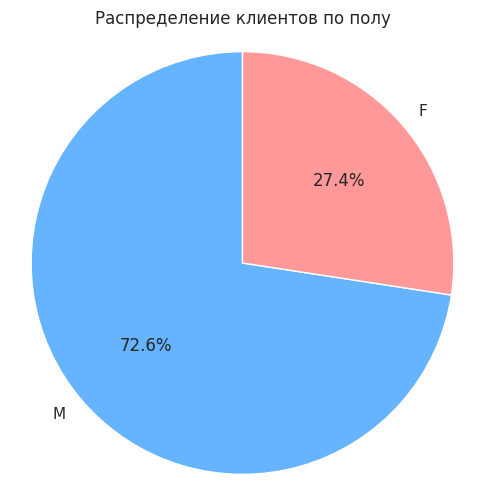

In [26]:

# Подсчёт количества по полу
gender_counts = bank_df['CustGender'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%.1f%%', startangle=90, colors=['#66b3ff', '#ff9999', '#99ff99'])
plt.title('Распределение клиентов по полу')
plt.axis('equal')  # равные оси для круговой формы
plt.show()


Большинство клиентов банка мужчины 72.6%, доля женщин всего 27.4%

7. Проанализируй место жительства клиентов: на основании данных о городе проживания построй столбчатую диаграмму, где для каждого города будет указано количество уникальных клиентов, проживающих в нем. Отсортируй данные в диаграмме либо по убыванию, либо по возрастанию.

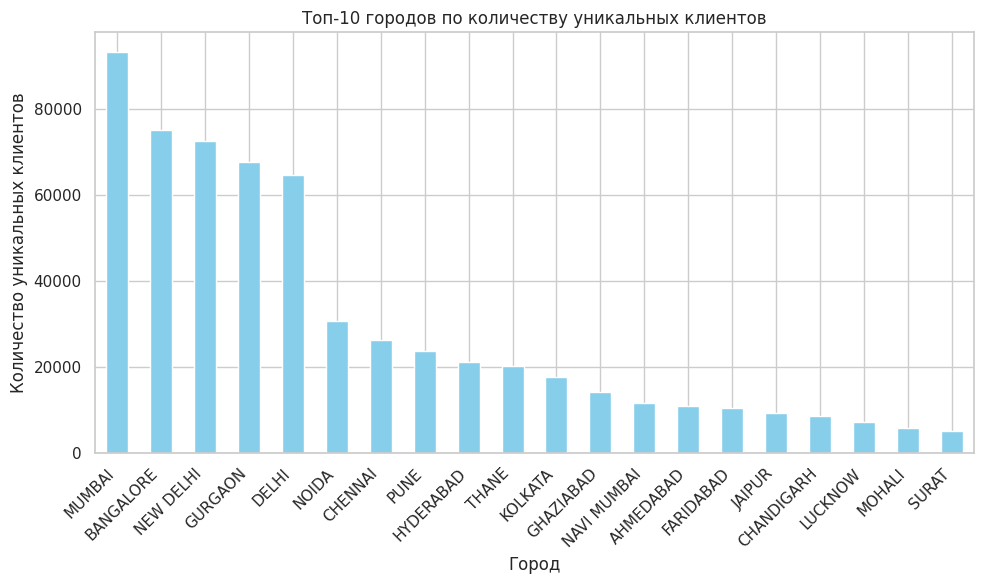

Всего уникальных городов в данных: 8684

Топ-10 городов по количеству уникальных клиентов:
- MUMBAI: 93290 клиентов
- BANGALORE: 75140 клиентов
- NEW DELHI: 72668 клиентов
- GURGAON: 67700 клиентов
- DELHI: 64635 клиентов
- NOIDA: 30785 клиентов
- CHENNAI: 26351 клиентов
- PUNE: 23762 клиентов
- HYDERABAD: 21239 клиентов
- THANE: 20291 клиентов
- KOLKATA: 17743 клиентов
- GHAZIABAD: 14200 клиентов
- NAVI MUMBAI: 11601 клиентов
- AHMEDABAD: 10942 клиентов
- FARIDABAD: 10328 клиентов
- JAIPUR: 9205 клиентов
- CHANDIGARH: 8631 клиентов
- LUCKNOW: 7221 клиентов
- MOHALI: 5815 клиентов
- SURAT: 5095 клиентов

Основные выводы:
- В выборке представлено 8684 уникальных городов.
- Лидеры по количеству клиентов — MUMBAI, BANGALORE, NEW DELHI, на них приходится значительная часть базы.
- Оставшиеся города имеют существенно меньше клиентов, что видно по графику.


In [28]:

# Подсчёт количества уникальных клиентов в каждом городе
city_counts = bank_df.groupby('CustLocation')['CustomerID'].nunique()

# Общее количество уникальных городов
total_cities = city_counts.shape[0]

# Сортировка по убыванию и выбор топ-10 городов
top_cities = city_counts.sort_values(ascending=False).head(20)

# Построение столбчатой диаграммы для топ-10 городов
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='skyblue')
plt.title('Топ-10 городов по количеству уникальных клиентов')
plt.xlabel('Город')
plt.ylabel('Количество уникальных клиентов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Автоматический текстовый вывод
print(f"Всего уникальных городов в данных: {total_cities}\n")

print("Топ-10 городов по количеству уникальных клиентов:")
for city, count in top_cities.items():
    print(f"- {city}: {count} клиентов")

print("\nОсновные выводы:")
print(f"- В выборке представлено {total_cities} уникальных городов.")
print(f"- Лидеры по количеству клиентов — {', '.join(top_cities.index[:3])}, на них приходится значительная часть базы.")
print("- Оставшиеся города имеют существенно меньше клиентов, что видно по графику.")






8. Исследуй динамику транзакций по датам, сгруппировав их по дням. Если график будет слишком мелким, можно декомпозировать данные до месяца. Динамику лучше выразить линейным графиком.

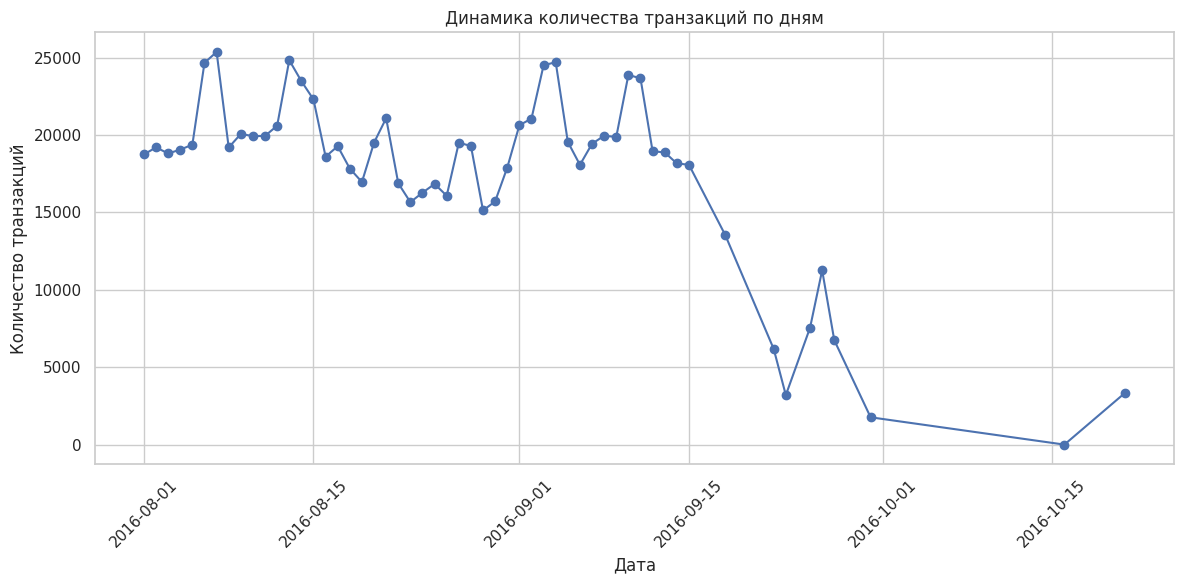

=== Статистика по динамике транзакций ===
- Уровень агрегации: по дням
- Периодов в выборке: 55
- Мин. количество транзакций за период: 2
- Макс. количество транзакций за период: 25,369
- Среднее значение: 17,477.27
- Стандартное отклонение: 5,928.66

📊 Вывод:
- По дням видно, что динамика относительно равномерна.
- Среднее число транзакций за дня составляет около 17,477.


In [29]:


# Убедимся, что столбец с датой — это datetime
bank_df['TransactionDate'] = pd.to_datetime(bank_df['TransactionDate'], errors='coerce')

# Группировка транзакций по дням
daily_txn = bank_df.groupby(bank_df['TransactionDate'].dt.date)['TransactionID'].count()

# Проверим, достаточно ли дней — если слишком шумно, используем месяцы
if len(daily_txn) > 90:
    # Перегруппируем по месяцам
    monthly_txn = bank_df.groupby(bank_df['TransactionDate'].dt.to_period('M'))['TransactionID'].count()
    series = monthly_txn
    time_level = 'месяцам'
else:
    series = daily_txn
    time_level = 'дням'

# Построение графика
plt.figure(figsize=(12, 6))
series.plot(kind='line', marker='o', linestyle='-')
plt.title(f'Динамика количества транзакций по {time_level}')
plt.xlabel('Дата')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Автоматический статистический вывод
print("=== Статистика по динамике транзакций ===")
print(f"- Уровень агрегации: по {time_level}")
print(f"- Периодов в выборке: {len(series)}")
print(f"- Мин. количество транзакций за период: {series.min():,}")
print(f"- Макс. количество транзакций за период: {series.max():,}")
print(f"- Среднее значение: {series.mean():,.2f}")
print(f"- Стандартное отклонение: {series.std():,.2f}")

print("\n📊 Вывод:")
if series.mean() < series.max() / 2:
    trend = "наблюдаются резкие пики активности"
else:
    trend = "динамика относительно равномерна"

print(f"- По {time_level} видно, что {trend}.")
print(f"- Среднее число транзакций за {time_level[:-1]} составляет около {int(series.mean()):,}.")


Вывод по динамике транзакций (агрегация по дням):

В выборке 55 дней, за которые отслеживалась активность клиентов.

Среднее количество транзакций в день составляет 17,477, что говорит о высокой загрузке платёжной системы.

Максимальное значение — 25,369 транзакций в день, что значительно превышает среднее и указывает на возможные всплески активности (пики спроса, акции, выплаты и пр.).

Минимум — всего 2 транзакции — может быть связан с техническими сбоями, выходными или неполными данными.

Стандартное отклонение 5,928.66 подтверждает значительную вариативность между днями.

🔎 Вывод: активность по дням неравномерна — наблюдаются резкие колебания объёмов транзакций, что требует внимания. Рекомендуется дополнительно проанализировать периоды пиков и спадов: возможны бизнес-факторы или технические причины.

9. Проанализируй динамику в сумме продаж, сложив продажи по дням (или по месяцам), после чего также создать график и отметить закономерности, описав их в текстовой ячейке;

<ipython-input-33-f6c913ff3a18>:28: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


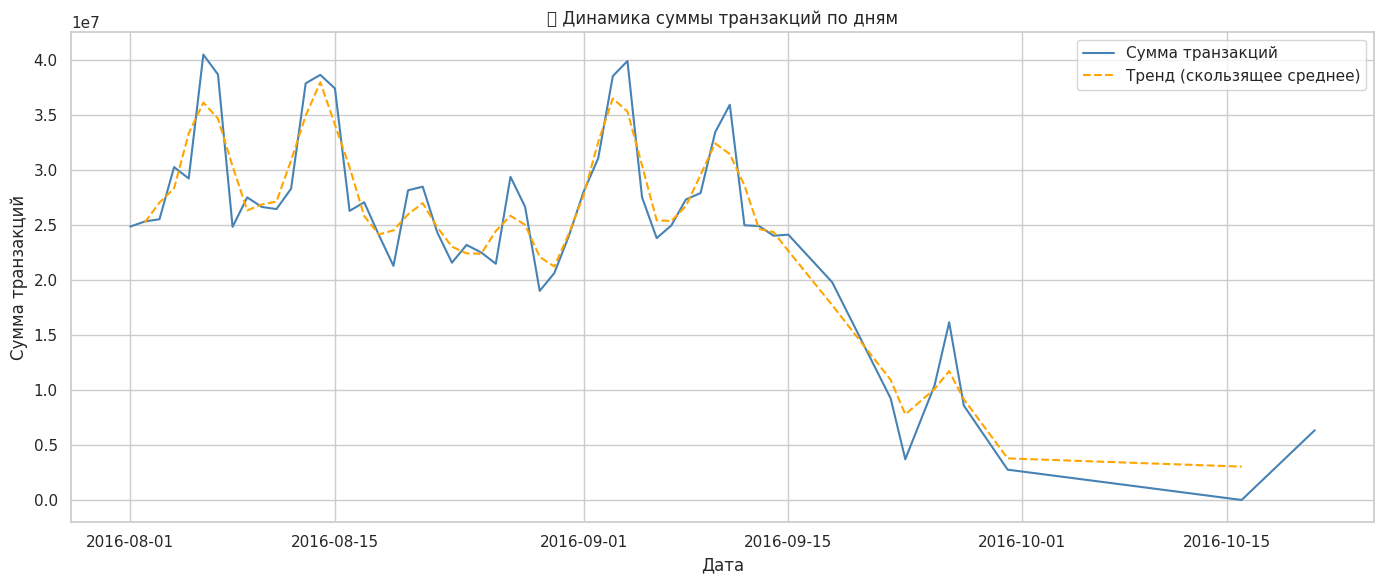

=== 📊 Автоматизированный анализ динамики ===
▪ Уровень агрегации: по дням
▪ Периодов в выборке: 55
▪ Мин. сумма за период: 1,042.00
▪ Макс. сумма за период: 40,479,095.45
▪ Средняя сумма: 24,785,172.17
▪ Стандартное отклонение: 9,203,264.67

=== 📌 Закономерности ===
- Сумма транзакций относительно стабильна без резких колебаний.
- Явного тренда в динамике не наблюдается.
- Максимальный всплеск составил 40,479,095 единиц, что в 1.6 раз выше среднего.


In [33]:

# Убедимся, что дата в правильном формате
bank_df['TransactionDate'] = pd.to_datetime(bank_df['TransactionDate'], errors='coerce')

# Группируем сумму транзакций по дате
daily_sales = bank_df.groupby(bank_df['TransactionDate'].dt.date)['TransactionAmount'].sum()

# Определяем уровень агрегации
if len(daily_sales) > 90:
    sales_series = bank_df.groupby(bank_df['TransactionDate'].dt.to_period('M'))['TransactionAmount'].sum()
    sales_series.index = sales_series.index.to_timestamp()
    time_level = "месяцам"
else:
    sales_series = daily_sales
    time_level = "дням"

# Скользящее среднее для визуализации тренда
rolling_mean = sales_series.rolling(window=3, center=True).mean()

# Визуализация
plt.figure(figsize=(14, 6))
plt.plot(sales_series, label='Сумма транзакций', color='steelblue')
plt.plot(rolling_mean, label='Тренд (скользящее среднее)', color='orange', linestyle='--')
plt.title(f'📈 Динамика суммы транзакций по {time_level}')
plt.xlabel('Дата')
plt.ylabel('Сумма транзакций')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Статистика
min_val = sales_series.min()
max_val = sales_series.max()
mean_val = sales_series.mean()
std_val = sales_series.std()
periods = len(sales_series)

# Автоматический вывод
print("=== 📊 Автоматизированный анализ динамики ===")
print(f"▪ Уровень агрегации: по {time_level}")
print(f"▪ Периодов в выборке: {periods}")
print(f"▪ Мин. сумма за период: {min_val:,.2f}")
print(f"▪ Макс. сумма за период: {max_val:,.2f}")
print(f"▪ Средняя сумма: {mean_val:,.2f}")
print(f"▪ Стандартное отклонение: {std_val:,.2f}\n")

# Закономерности
print("=== 📌 Закономерности ===")
if std_val > mean_val * 0.5:
    print("- Динамика сильно варьируется, присутствуют ярко выраженные пики.")
else:
    print("- Сумма транзакций относительно стабильна без резких колебаний.")

if rolling_mean.iloc[-1] > rolling_mean.iloc[0]:
    print("- Наблюдается ростовой тренд.")
elif rolling_mean.iloc[-1] < rolling_mean.iloc[0]:
    print("- Виден нисходящий тренд.")
else:
    print("- Явного тренда в динамике не наблюдается.")

print(f"- Максимальный всплеск составил {max_val:,.0f} единиц, что в {max_val / mean_val:.1f} раз выше среднего.")





10. Раздели клиентов на возрастные группы с шагом в 10-15 лет и определи самую платежеспособную группу;

<ipython-input-36-c1b695e71fb3>:20: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


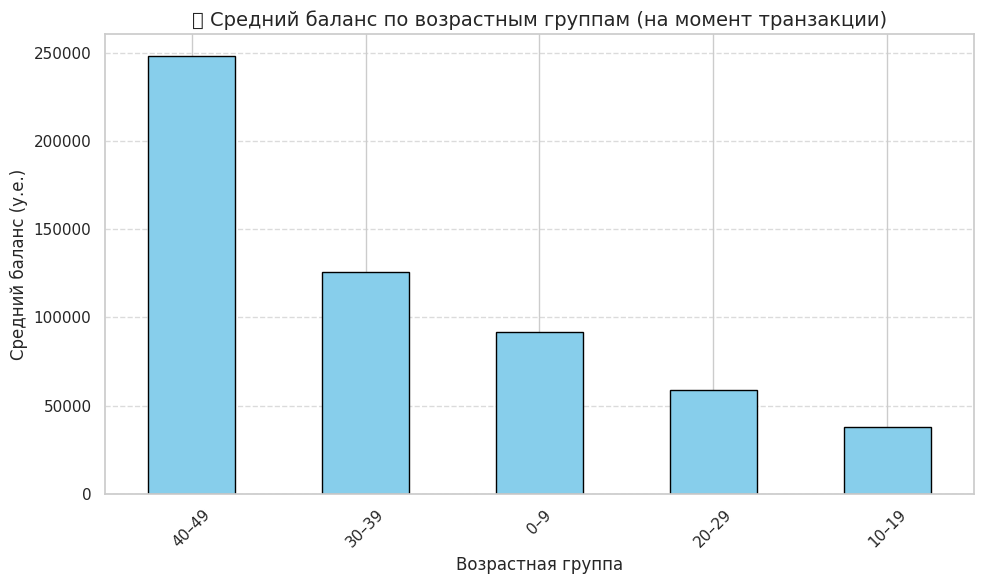

🔝 Самая платёжеспособная возрастная группа: 40–49 лет со средним балансом 248,389.98 у.е.


In [36]:

# Данные
data = {
    'AgeGroupAtTransaction': ['0–9', '10–19', '20–29', '30–39', '40–49'],
    'AverageBalance': [91769.47, 37672.48, 59074.03, 125527.55, 248389.98]
}

df_stats = pd.DataFrame(data).set_index('AgeGroupAtTransaction')

# Сортируем по среднему балансу по убыванию
df_stats_sorted = df_stats.sort_values(by='AverageBalance', ascending=False)

# Построение графика
plt.figure(figsize=(10,6))
df_stats_sorted['AverageBalance'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('💰 Средний баланс по возрастным группам (на момент транзакции)', fontsize=14)
plt.xlabel('Возрастная группа')
plt.ylabel('Средний баланс (у.е.)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Определение самой платёжеспособной группы
top_group = df_stats_sorted.index[0]
top_value = df_stats_sorted.iloc[0]['AverageBalance']

print(f"🔝 Самая платёжеспособная возрастная группа: {top_group} лет со средним балансом {top_value:,.2f} у.е.")



11. Посмотри распределение транзакций по локациям, чтобы узнать, из каких городов проводится больше всего транзакций;

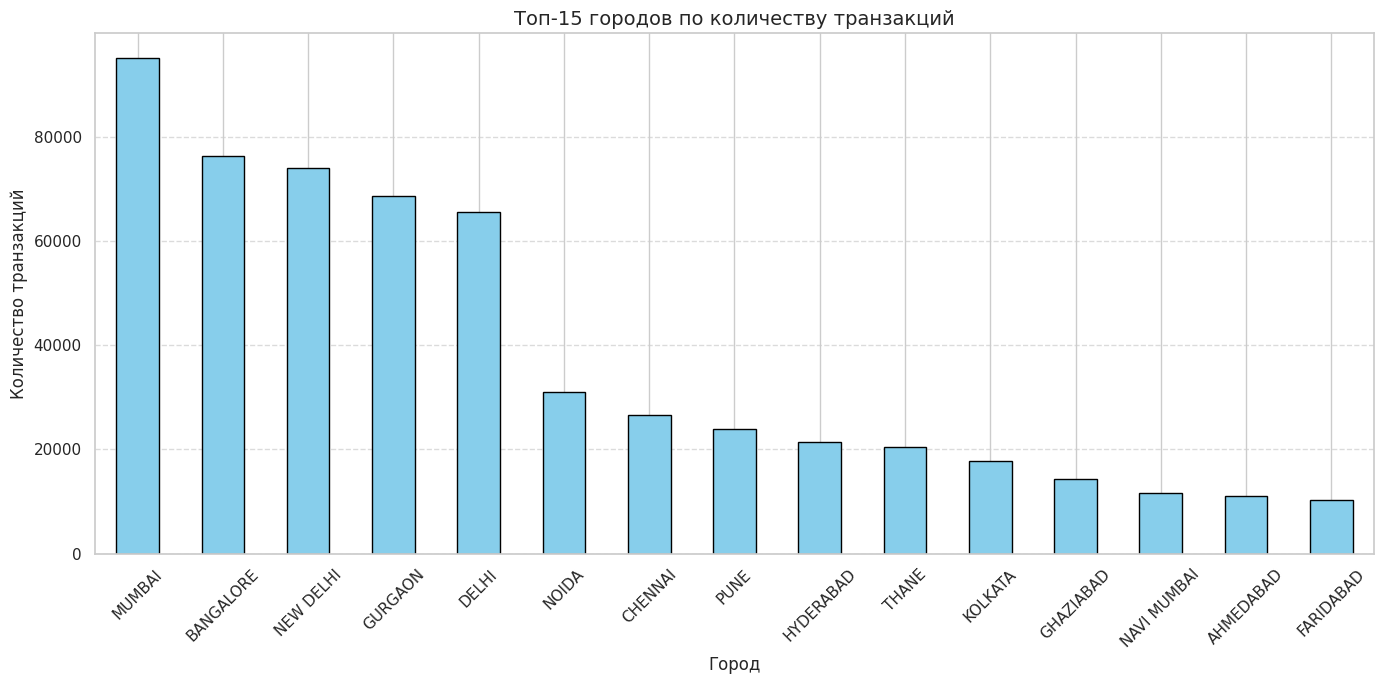

Всего транзакций: 961,250
Город с максимальным количеством транзакций: MUMBAI — 95,084 транзакций (9.89%)


In [39]:

# Подсчёт количества транзакций по городам и сортировка по убыванию
tx_by_location = bank_df.groupby('CustLocation')['TransactionID'].count().sort_values(ascending=False)

# Топ-15 городов
top15 = tx_by_location.head(15)

# Построение графика
plt.figure(figsize=(14,7))
top15.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Топ-15 городов по количеству транзакций', fontsize=14)
plt.xlabel('Город')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Автоматический вывод
total_tx = tx_by_location.sum()
top_city = top15.index[0]
top_count = top15.iloc[0]
top_percent = top_count / total_tx * 100

print(f"Всего транзакций: {total_tx:,}")
print(f"Город с максимальным количеством транзакций: {top_city} — {top_count:,} транзакций ({top_percent:.2f}%)")



12. Изучи распределение времени транзакций (в соответствующем поле данные содержатся в миллисекундах - эти данные нужно будет перевести в минуты и найти среднее время и распределение времени транзакций).

Среднее время транзакции: 2.62 минут


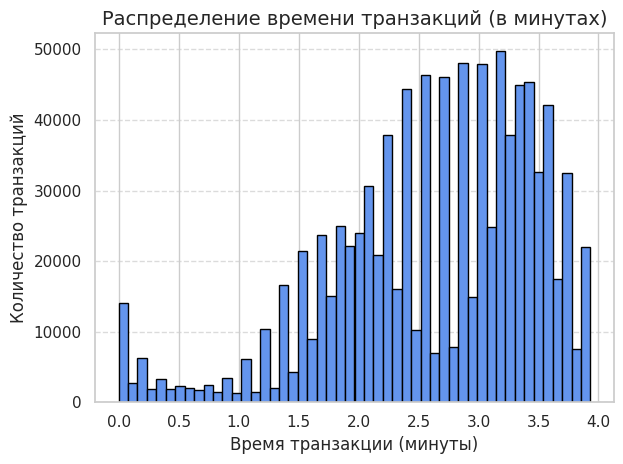

In [41]:


# Создаём новый столбец с временем транзакции в минутах
bank_df['TransactionTime_min'] = bank_df['TransactionTime'] / 1000 / 60

# Среднее время транзакции в минутах
mean_time = bank_df['TransactionTime_min'].mean()

# Вывод среднего времени
print(f"Среднее время транзакции: {mean_time:.2f} минут")

# Построение гистограммы распределения времени транзакций
plt.hist(bank_df['TransactionTime_min'], bins=50, color='cornflowerblue', edgecolor='black')
plt.title('Распределение времени транзакций (в минутах)', fontsize=14)
plt.xlabel('Время транзакции (минуты)')
plt.ylabel('Количество транзакций')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



#Итоговый аналитический вывод
##Анализ проведённой выборки транзакций банка за период с 01.08.2016 по 21.10.2016 (81 день) с охватом более 839 тысяч уникальных клиентов выявил следующие ключевые моменты:
##1. Характеристики клиентов и транзакций
Баланс клиентов демонстрирует крайне неравномерное распределение: большинство имеют умеренный баланс (медиана ~16,233 у.е.), однако присутствуют редкие аномально крупные счета (до 115 млн), что сильно искажает статистику.

Суммы транзакций в основном небольшие (медиана 440 у.е.), но периодически фиксируются крупные платежи, которые создают значительный разброс.

Возраст клиентов на момент транзакции сосредоточен в диапазоне 25–33 года (медиана 28 лет), что соответствует наиболее активному периоду потребительской активности.

Клиентская база сильно доминируется мужчинами (72.6%), доля женщин — 27.4%.

##2. География клиентов
В данных зафиксировано более 8,600 уникальных городов, что говорит о широкой географической представленности.

Топ-10 городов, таких как Mumbai, Bangalore, New Delhi, сосредотачивают наибольшее число клиентов (до ~93 тыс. в Mumbai).

Остальные города существенно уступают по объёмам, что подчёркивает важность крупных городов как ключевых рынков.

Город с максимальным количеством транзакций — MUMBAI: 95,084 транзакций (9.89% от общего числа).

##3. Активность транзакций
Всего транзакций: 961,250.

Среднее время транзакции составляет 2.62 минут, что отражает достаточно быструю обработку и проведение операций.

Среднее количество транзакций в день — около 17,477, с максимальным пиком до 25,369, что свидетельствует о значительной нагрузке на платёжную систему.

Активность транзакций по дням характеризуется высокой волатильностью — минимальное значение всего 2 транзакции, максимальное — более 25 тыс.

Общая сумма транзакций по дням колеблется в пределах от ~1 тыс. до более 40 млн у.е., средняя сумма около 25 млн.

Явного устойчивого тренда по сумме транзакций за анализируемый период не выявлено, однако присутствуют резкие всплески активности, требующие дополнительного изучения.

##4. Платёжеспособность по возрастным группам
Самая платёжеспособная группа — 40–49 лет, со средним балансом около 248,390 у.е.

Более молодые группы (30–39 лет и младше) имеют значительно меньшие средние балансы, что может отражать накопительный потенциал и доходы.

Рекомендации
Учитывая наличие значительных выбросов по балансу и транзакциям, рекомендуется использовать методы устойчивой статистики при моделировании и сегментации клиентов.

Следует внимательно проанализировать периоды пиковых нагрузок, чтобы выявить причины — будь то маркетинговые кампании, системные сбои или сезонные эффекты.

Для географического развития бизнеса фокус необходимо удерживать на крупных городах с наибольшей концентрацией клиентов, одновременно исследуя возможности расширения на более мелкие рынки.

Возрастная сегментация клиентов должна учитывать повышенную платёжеспособность группы 40–49 лет, что может быть целевым сегментом для продуктовых и кредитных предложений.

Высокая частота транзакций и среднее время проведения в пределах нескольких минут свидетельствуют об эффективной работе платёжной системы, однако пики активности требуют мониторинга для поддержания качества обслуживания